# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [90]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [91]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import smdebug

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-01-15 19:21:36--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.41
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  48.2MB/s    in 24s     

2022-01-15 19:22:08 (44.5 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

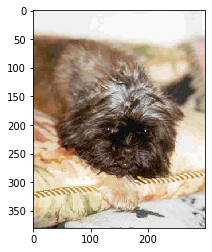

In [3]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg'));

In [6]:
#uploading the data to s3
import sagemaker
from sagemaker import get_execution_role


bucket= 'sagemaker-studio-yu2vuusg7ad' ## TODO: fill in
print("Default Bucket: {}".format(bucket))

region = 'us-east-1' ## TODO: fill in
print("AWS Region: {}".format(region))

role = get_execution_role()## TODO: fill in
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-studio-yu2vuusg7ad
AWS Region: us-east-1
RoleArn: arn:aws:iam::530074159328:role/service-role/AmazonSageMaker-ExecutionRole-20211228T132324


In [7]:
#uploading to
import os

os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/dogImages/

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-studio-yu2vuusg7ad/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpins

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [58]:
import sagemaker
from sagemaker import get_execution_role

In [4]:
bucket= 'sagemaker-studio-unwwfklhove' ## TODO: fill in
print("Default Bucket: {}".format(bucket))

region = 'us-east-1' ## TODO: fill in
print("AWS Region: {}".format(region))

role = get_execution_role()## TODO: fill in
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-studio-unwwfklhove
AWS Region: us-east-1
RoleArn: arn:aws:iam::530074159328:role/service-role/AmazonSageMaker-ExecutionRole-20211228T132324


In [ ]:


os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./train s3://${DEFAULT_S3_BUCKET}/train/
!aws s3 sync ./test s3://${DEFAULT_S3_BUCKET}/test/

In [10]:
sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "dogImages"

role = sagemaker.get_execution_role()

input_data = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)

In [13]:
# TODO: Upload the data to an S3 bucket. You can use the sagemaker_session object, boto3 or the AWS CLI

print("input spec (in this case, just an S3 path): {}".format(input_data))

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-530074159328/dogImages


In [7]:
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
}

objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [59]:
#TODO: Create estimators for your HPs
role = sagemaker.get_execution_role()
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name='dog_images_pytorch',
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"

)# TODO: Your estimator here

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
)# TODO: Your HP tuner here

In [ ]:
import os
# TODO: Fit your HP Tuner
os.environ['SM_CHANNEL_TRAINING']='s3://sagemaker-us-east-1-530074159328/dogImages/'
os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-530074159328/dogImages/model'
os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-530074159328/dogImages/output'
tuner.fit({"training": "s3://sagemaker-us-east-1-530074159328/dogImages/"},wait=True) # TODO: Remember to include your data channels

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [9]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()#TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-01-16 21:56:36 Starting - Preparing the instances for training
2022-01-16 21:56:36 Downloading - Downloading input data
2022-01-16 21:56:36 Training - Training image download completed. Training in progress.
2022-01-16 21:56:36 Uploading - Uploading generated training model
2022-01-16 21:56:36 Completed - Training job completed


{'_tuning_objective_metric': '"Test Loss"',
 'batch_size': '"32"',
 'lr': '0.007559624430866038',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"dog_images_pytorch-2022-01-16-21-20-31-399"',
 'sagemaker_program': '"train_model.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-530074159328/dog_images_pytorch-2022-01-16-21-20-31-399/source/sourcedir.tar.gz"'}

In [11]:
hyperparameters = {"batch_size": int(best_estimator.hyperparameters()['batch_size'].replace('"', '')), \
                   "learning_rate": best_estimator.hyperparameters()['lr']}
hyperparameters

{'batch_size': 32, 'learning_rate': '0.007559624430866038'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [60]:
# Setting up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, CollectionConfig
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]
collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0",parameters={
    "include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "10","eval.save_interval": "1"})]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)
debugger_config=DebuggerHookConfig(
    collection_configs=collection_configs
)
#debugger_config = DebuggerHookConfig(
        #hook_parameters={"train.save_interval": "10", "eval.save_interval": "10"}
#)

In [63]:
# TODO: Create and fit an estimator

hyperparameters = {"batch_size": "32", "lr": "0.007559624430866038"} # Training with best parameters

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    entry_point="hpo.py",
    framework_version="1.4.0",
    py_version="py3",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config, # include the profiler hook
    debugger_hook_config=debugger_config, # include the debugger hook
    rules=rules
)# TODO: Your estimator here

In [64]:
estimator.fit({"training": "s3://sagemaker-us-east-1-530074159328/dogImages/"},wait=True)

2022-01-17 10:22:22 Starting - Starting the training job...
2022-01-17 10:22:42 Starting - Launching requested ML instancesVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2022-01-17 10:23:45 Starting - Preparing the instances for training.........
2022-01-17 10:25:14 Downloading - Downloading input data............
2022-01-17 10:27:20 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-01-17 10:27:21,152 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2022-01-17 10:27:21,174 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-01-17 10:27:24,203 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-01-17 10:27:27,869 sagemaker-containers INFO     Module d

In [65]:
import boto3

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

Training jobname: pytorch-training-2022-01-17-10-22-21-493
Region: us-east-1


In [66]:
# TODO: Plot a debugging output.
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")


trial = create_trial(estimator.latest_job_debugger_artifacts_path())

print(trial.tensor_names())
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.EVAL)))

Training jobname: pytorch-training-2022-01-17-10-22-21-493
Region: us-east-1
[2022-01-17 10:30:26.288 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-530074159328/pytorch-training-2022-01-17-10-22-21-493/debug-output
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'gradient/ResNet_fc.2.bias', 'gradient/ResNet_fc.2.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu_input_2', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer2.1.relu_input_2', 'layer2.2.relu_input_0', 'layer2.2.relu_input_1', 'layer2.2.relu_input_2', 'layer2.3.relu_input_0', 'layer2.3.relu_input_1', 'layer2.3.relu_input_2', 'layer3.0.re

In [67]:
tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-530074159328/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }'}}
s3 path:s3://sagemaker-us-east-1-530074159328/pytorch-training-2022-01-17-10-22-21-493/profiler-output


Profiler data from system is available
[2022-01-17 10:30:34.007 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO metrics_reader_base.py:134] Getting 5 event files
select events:[

You will find the profiler report in s3://sagemaker-us-east-1-530074159328/pytorch-training-2022-01-17-10-22-21-493/rule-output


In [68]:
# plot the loss curve: check the next three steps

def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [73]:
tensor_name = "CrossEntropyLoss_output_0"
get_data(trial, tensor_name, mode=ModeKeys.TRAIN)

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 [array(4.8998275, dtype=float32),
  array(4.8768873, dtype=float32),
  array(4.880722, dtype=float32),
  array(4.898606, dtype=float32),
  array(4.8879604, dtype=float32),
  array(4.883326, dtype=float32),
  array(4.890844, dtype=float32),
  array(4.876379, dtype=float32),
  array(4.878237, dtype=float32),
  array(4.899189, dtype=float32),
  array(4.8840437, dtype=float32),
  array(4.890357, dtype=float32),
  array(4.8637357, dtype=float32),
  array(4.883633, dtype=float32),
  array(4.8330336, dtype=float32),
  array(4.8997784, dtype=float32),
  array(4.8523264, dtype=float32),
  array(4.8733597, dtype=float32),
  array(4.8398, dtype=float32),
  array(4.850119, dtype=float32),
  array(4.894642, dtype=float32)])

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

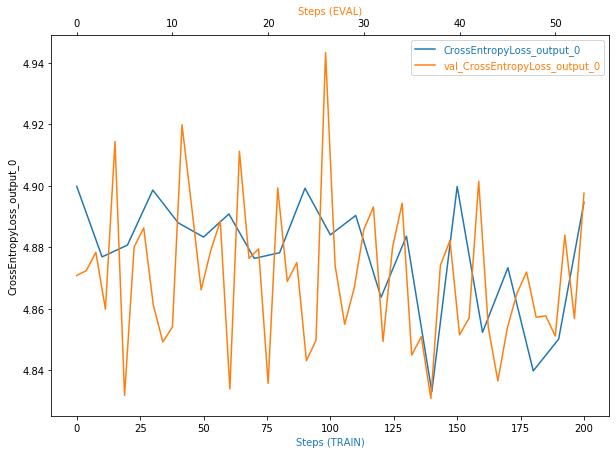

In [76]:
plot_tensor(trial, tensor_name)
#plot_tensor(trial, "accuracy")

In [77]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-530074159328/pytorch-training-2022-01-17-10-22-21-493/rule-output


**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  

There is anomalous behaviour as the line should be smooth line in the debugger report.
I should adjust the model.

**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [78]:
# TODO: Display the profiler output
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

2022-01-17 10:29:54     335921 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-01-17 10:29:54     178312 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-01-17 10:29:50        191 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-01-17 10:29:50       7296 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-01-17 10:29:50        126 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-01-17 10:29:50        129 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-01-17 10:29:50       3568 pytorch-training-2022-01-17-10-22-21-493/rule-output/ProfilerReport/profiler-output/profiler-re

## Model Deploying

In [79]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge") # TODO: Add your deployment configuration like instance type and number of instances

-----------!

In [87]:
from PIL import Image
import io
# TODO: Run an prediction on the endpoint
with open("./test.jpg", "rb") as f:
    payload = f.read()
    
type(payload)

bytes

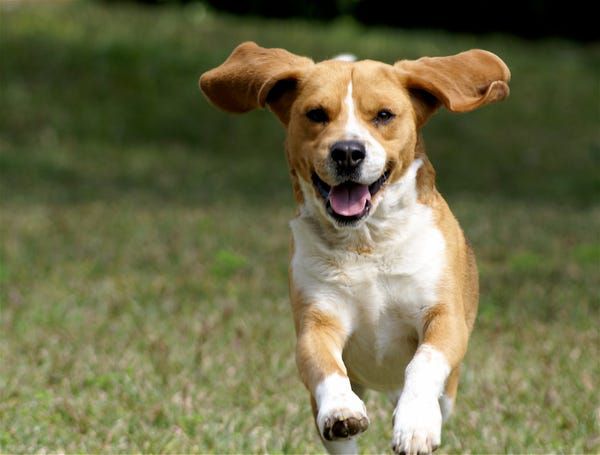

In [88]:
from PIL import Image
import io
Image.open(io.BytesIO(payload))

In [93]:
response=predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})
response

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (500) from primary with message "No module named 'smdebug'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 110, in transform
    self.validate_and_initialize(model_dir=model_dir)
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 157, in validate_and_initialize
    self._validate_user_module_and_set_functions()
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 170, in _validate_user_module_and_set_functions
    user_module = importlib.import_module(user_module_name)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/ml/model/code/hpo.py", line 13, in <module>
    import smdebug.pytorch as smd
ModuleNotFoundError: No module named 'smdebug'
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-training-2022-01-17-10-42-40-663 in account 530074159328 for more information.

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()